In [3]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [4]:
# 读取数据
# path to where the data lies
dpath = '../data/'
train = pd.read_csv(dpath +"Otto_train.csv")
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
train.info

<bound method DataFrame.info of           id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  \
0          1       1       0       0       0       0       0       0       0   
1          2       0       0       0       0       0       0       0       1   
2          3       0       0       0       0       0       0       0       1   
3          4       1       0       0       1       6       1       5       0   
4          5       0       0       0       0       0       0       0       0   
5          6       2       1       0       0       7       0       0       0   
6          7       2       0       0       0       0       0       0       2   
7          8       0       0       0       0       0       0       0       0   
8          9       0       0       0       0       0       0       0       4   
9         10       0       0       0       0       0       0       1       0   
10        11       0       1       1       2       0       0       2       1   
11      

In [6]:
## 各属性的统计特性
train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


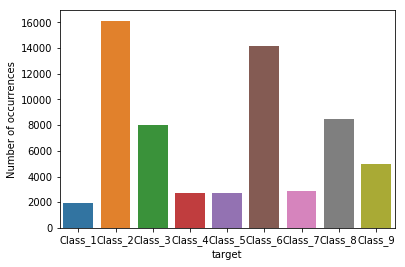

In [7]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(train["target"]);
pyplot.xlabel('target');
pyplot.ylabel('Number of occurrences');

In [ ]:
# 将类别字符串变成数字
# drop ids and get labels
y_train = train["target"]
y_train = y_train.map(lambda s: s[6:])
y_train = y_train.map(lambda s: int(s)-1)

train = train.drop(["id", "target"], axis=1)
X_train = np.array(train)
X_train

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  3, 10,  0],
       [ 0,  0,  0, ...,  0,  2,  0]])

In [ ]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_train

/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.40209324, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       ...,
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [ 0.40209324, -0.21010603, -0.30716546, ...,  1.33702606,
         9.792457  , -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
         1.64894093, -0.10496314]])

In [ ]:
# 训练样本6w+，交叉验证太慢，用train_test_split估计模型性能

from sklearn.model_selection import train_test_split

X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, train_size = 0.8,random_state = 0)

X_train_part

/usr/local/python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([[-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [ 1.05769457,  9.37407441,  0.03357394, ...,  0.35933168,
        -0.38693809, -0.10496314],
       ...,
       [-0.25350808, -0.21010603,  4.12244675, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603,  3.10022855, ..., -0.12951551,
         9.792457  , -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314]])

# default SVC

In [ ]:
from sklearn.svm import LinearSVC

SVC1 = LinearSVC().fit(X_train_part, y_train_part)

In [ ]:
#在校验集上测试，估计模型性能
y_predict = SVC1.predict(X_val)

#print("Classification report for classifier %s:\n%s\n"
   #% (SVC1, metrics.classification_report(y_val, y_predict)))
#print("1  Confusion matrix:\n%s" % metrics.confusion_matrix(y_val, y_predict))

线性SVM正则参数调优

线性SVM LinearSVC的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1）

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

这里我们用校验集（X_val、y_val）来估计模型性能


In [ ]:
def fit_grid_point_Linear(C, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC2 =  LinearSVC( C = C)
    SVC2 = SVC2.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC2.score(X_val, y_val)
    
    print("fit_grid_point_Linear accuracy: {}".format(accuracy))
    return accuracy

logspace C_s  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
fit_grid_point_Linear accuracy: 0.7377989657401423
fit_grid_point_Linear accuracy: 0.7458791208791209
fit_grid_point_Linear accuracy: 0.7479799612152553
fit_grid_point_Linear accuracy: 0.748868778280543
fit_grid_point_Linear accuracy: 0.7447478991596639
fit_grid_point_Linear accuracy: 0.693923723335488


No handles with labels found to put in legend.


fit_grid_point_Linear accuracy: 0.6401098901098901


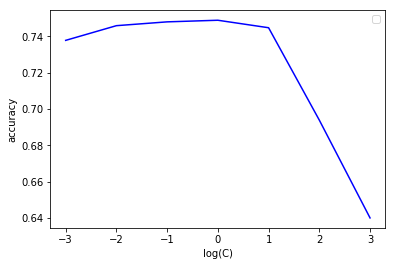

Shown Correctly


In [ ]:
#需要调优的参数
C_s = np.logspace(-3, 3, 7)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份  
#penalty_s = ['l1','l2']
print("logspace C_s ", C_s)
      
accuracy_s = []
for i, oneC in enumerate(C_s):
#    for j, penalty in enumerate(penalty_s):
    tmp = fit_grid_point_Linear(oneC, X_train, y_train, X_val, y_val)
    accuracy_s.append(tmp)

x_axis = np.log10(C_s)
#for j, penalty in enumerate(penalty_s):
pyplot.plot(x_axis, np.array(accuracy_s), 'b-')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )
pyplot.savefig('SVM_Otto.png' )

pyplot.show()
print("Shown Correctly")


RBF核SVM正则参数调优

RBF核是SVM最常用的核函数（没有之一）。 RBF核SVM 的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和核函数的宽度gamma C越小，决策边界越平滑； gamma越小，决策边界越平滑。

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

这里我们用校验集（X_val、y_val）来估计模型性能


In [ ]:
from sklearn.svm import SVC

In [ ]:
def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    SVC3 = SVC3.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC3.score(X_val, y_val)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

In [ ]:
#需要调优的参数
C_s = np.logspace(-2, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-2, 2, 5)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_val, y_val)
        accuracy_s.append(tmp)

accuracy: 0.6769553975436329
accuracy: 0.4462669683257919


从上述部分运行结果来看，gamma参数设置不合适（gamma越大，对应RBF核的sigma越小，决策边界更复杂，可能发生了过拟合） 所以调小gamma值

In [ ]:
#需要调优的参数
C_s = np.logspace(-1, 2, 4)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-5, -2, 4)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_val, y_val)
        accuracy_s.append(tmp)

In [ ]:
#需要调优的参数
C_s = np.logspace(-2, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-2, 2, 5)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_val, y_val)
        accuracy_s.append(tmp)

从上述部分运行结果来看，gamma参数设置不合适（gamma越大，对应RBF核的sigma越小，决策边界更复杂，可能发生了过拟合） 所以调小gamma值

In [ ]:
#需要调优的参数
C_s = np.logspace(-1, 2, 4)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-5, -2, 4)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_val, y_val)
        accuracy_s.append(tmp)

In [ ]:
accuracy_s1 =np.array(accuracy_s).reshape(len(C_s),len(gamma_s))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    pyplot.plot(x_axis, np.array(accuracy_s1[:,j]), label = ' Test - log(gamma)' + str(np.log10(gamma)))

pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )
pyplot.savefig('RBF_SVM_Otto.png' )

pyplot.show()